# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [17]:
#Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
transaksiklasifikasi = pd.read_csv("https://raw.githubusercontent.com/RizkiYanuar-Tech/Dataset/refs/heads/main/Transaksi_clustering%20(1).csv")
transaksiklasifikasi

,TransactionID,AccountID,TransactionAmount,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_sclr,AgeGroup,Cluster
0,TX000001,AC00128,14.09,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1,5112.21,1.423718,65-80,0
1,TX000002,AC00455,376.24,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1,13758.91,1.311287,65-80,0
2,TX000003,AC00019,126.29,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1,1122.35,-1.443277,18-24,1
3,TX000004,AC00070,184.50,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1,8569.06,-1.049768,25-34,1
4,TX000005,AC00411,13.45,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26.0,Student,198.0,1,7429.40,-1.049768,25-34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33.0,Doctor,109.0,1,12690.79,-0.656259,25-34,1
2508,TX002509,AC00322,251.54,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48.0,Doctor,177.0,1,254.75,0.186975,45-54,0
2509,TX002510,AC00095,28.63,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56.0,Retired,146.0,1,3382.91,0.636700,55-64,0
2510,TX002511,AC00118,185.97,Debit,Denver,D000634,21.190.11.223,M041,Online,23.0,Student,19.0,1,1776.91,-1.218415,18-24,1


## **Encoding Variable Kategori**

In [3]:
# Pastikan LabelEncoder yang sama digunakan
label_encoders = {}

for col in ['TransactionID','AccountID','DeviceID','IP Address','MerchantID','TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'AgeGroup']:
    le = LabelEncoder()
    transaksiklasifikasi[col] = le.fit_transform(transaksiklasifikasi[col])
    label_encoders[col] = le

transaksiklasifikasi.head()

,TransactionID,AccountID,TransactionAmount,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_sclr,AgeGroup,Cluster
0,0,126,14.09,1,36,365,186,14,0,70.0,0,81.0,1,5112.21,1.423718,5,0
1,1,450,376.24,1,15,50,82,51,0,68.0,0,141.0,1,13758.91,1.311287,5,0
2,2,18,126.29,1,23,229,343,8,2,19.0,3,56.0,1,1122.35,-1.443277,0,1
3,3,68,184.50,1,33,182,300,1,2,26.0,3,25.0,1,8569.06,-1.049768,1,1
4,4,406,13.45,0,1,298,501,90,2,26.0,3,198.0,1,7429.40,-1.049768,1,1


In [4]:
#Hapus Atribut CustomerAge_sclr dan AgeGroup
transaksiklasifikasi = transaksiklasifikasi.drop(['CustomerAge_sclr'], axis=1)
transaksiklasifikasi = transaksiklasifikasi.drop(['AgeGroup'], axis=1)

#Age to int
transaksiklasifikasi['CustomerAge'] = transaksiklasifikasi['CustomerAge'].astype(int)
transaksiklasifikasi.head()

,TransactionID,AccountID,TransactionAmount,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,0,126,14.09,1,36,365,186,14,0,70,0,81.0,1,5112.21,0
1,1,450,376.24,1,15,50,82,51,0,68,0,141.0,1,13758.91,0
2,2,18,126.29,1,23,229,343,8,2,19,3,56.0,1,1122.35,1
3,3,68,184.50,1,33,182,300,1,2,26,3,25.0,1,8569.06,1
4,4,406,13.45,0,1,298,501,90,2,26,3,198.0,1,7429.40,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
#Pengambilan Fitur dan Fitur Target
X = transaksiklasifikasi.drop(['Cluster'], axis=1)
y = transaksiklasifikasi['Cluster']

#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

### **Decision Tree**

In [18]:
# Inisialisasi model Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train model
dt_classifier.fit(X_train, y_train)

# Prediksi pada data test
y_pred = dt_classifier.predict(X_test)

### **KNN**

In [7]:
#Model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

#Predict
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

### **Evaluasi DecisionTree**

In [19]:
# Calculate accuracy for Decision Tree
accuracy_train = accuracy_score(y_train, dt_classifier.predict(X_train))
accuracy_test = accuracy_score(y_test, dt_classifier.predict(X_test))

print("Akurasi latih: ", accuracy_train)
print("Akurasi uji: ", accuracy_test)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, dt_classifier.predict(X_test)))

Akurasi latih:  1.0
Akurasi uji:  1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       262
           1       1.00      1.00      1.00       241

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503



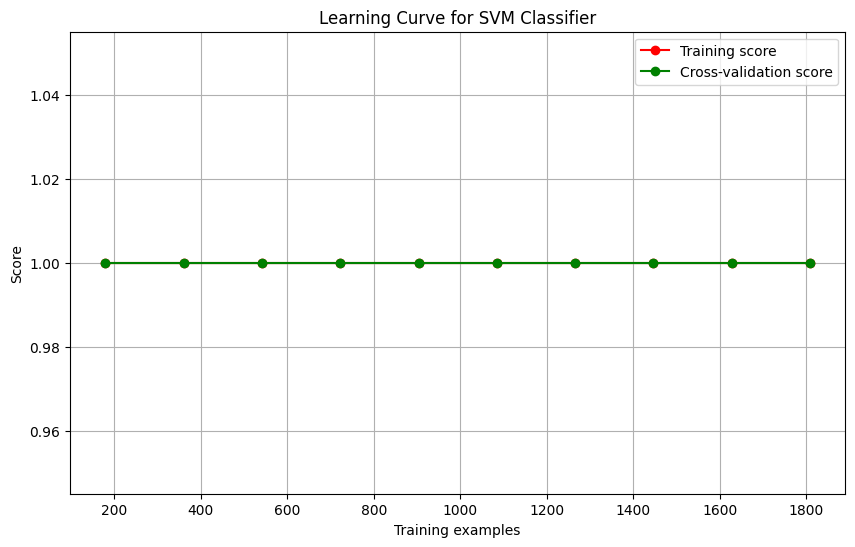

In [20]:
# Define training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes_abs, train_scores, test_scores = learning_curve(
    dt_classifier, X_train, y_train, train_sizes=train_sizes, cv=10, scoring='accuracy')

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for SVM Classifier")
plt.legend(loc="best")
plt.grid()
plt.show()

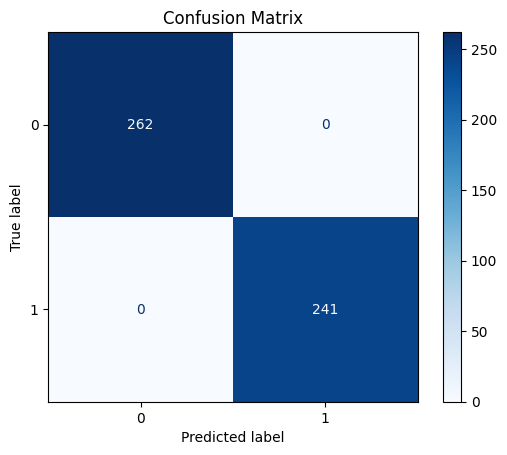

In [21]:
# Melatih model DecisionTree
dt_classifier.fit(X_train, y_train)

# Memprediksi kelas menggunakan model DecisionTree
y_test_predict = dt_classifier.predict(X_test)

# Inisialisasi confusion matrix
cm = confusion_matrix(y_test, y_test_predict)

# Tampilkan confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_classifier.classes_)
display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Pada Algoritma SVM menghasilkan akurasi pada data train sebesar 69%, sedangkan pada data testing sebesar 68%

Confusion Matrix 1 = Positive 0 = Negative
*   True Positve = 241 data actual (positive) dan data prediksi (positive)
*   True Negative = 262 data actual (negative) dan data prediksi (Negative)
*   False Negative = 0 data actual (Negative) dan data prediksi (Positive)
*   False Positive = 0 data actual (Positive) dan data prediksi (Negative)





### **Evaluasi KNN**

In [11]:
accuracy_train = accuracy_score(y_train_predict, y_train)
accuracy_test = accuracy_score(y_test_predict, y_test)

print("Accuracy latih: ", accuracy_train)
print("Accuracy test: ", accuracy_test)

print(classification_report(y_test, y_test_predict))

Accuracy latih:  0.7735191637630662
Accuracy test:  0.6819085487077535
              precision    recall  f1-score   support

           0       0.66      0.82      0.73       262
           1       0.73      0.53      0.62       241

    accuracy                           0.68       503
   macro avg       0.69      0.68      0.67       503
weighted avg       0.69      0.68      0.67       503



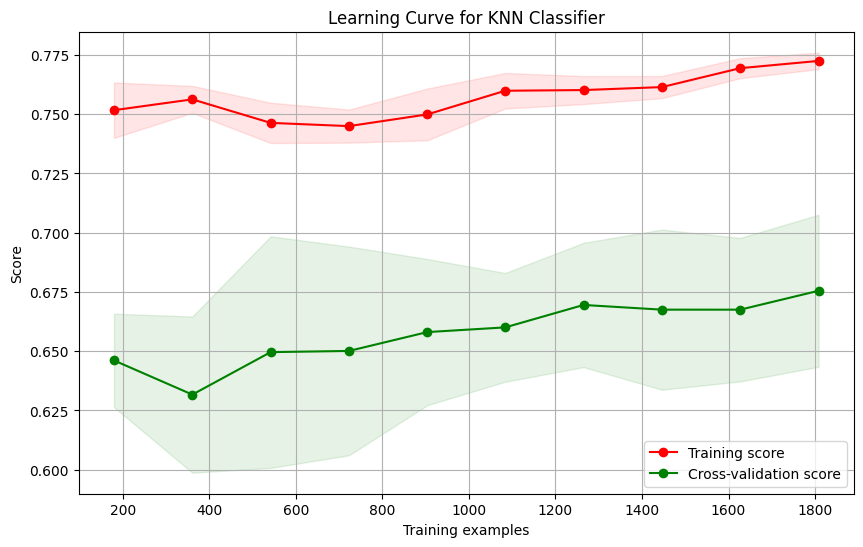

In [12]:
# Define training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes_abs, train_scores, test_scores = learning_curve(
    knn, X_train, y_train, train_sizes=train_sizes, cv=10, scoring='accuracy')

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for KNN Classifier")
plt.legend(loc="best")
plt.grid()
plt.show()

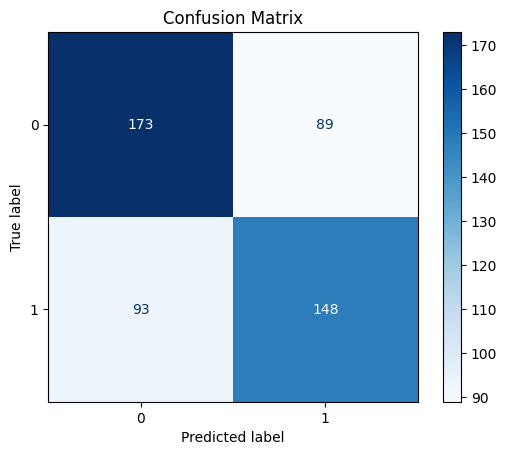

In [13]:
y_test_predict = knn.predict(X_test)

#Inisialisasi confusion matrix
cm = confusion_matrix(y_test, y_test_predict)

#Tampilkan confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)
display.plot(cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Pada Algoritma KNN menghasilkan akurasi pada data train sebesar 77%, sedangkan pada data testing sebesar 68%

Confusion Matrix 1 = Positive 0 = Negative
*   True Positve = 148 data actual (positive) dan data prediksi (positive)
*   True Negative = 173 data actual (negative) dan data prediksi (Negative)
*   False Negative = 89 data actual (Negative) dan data prediksi (Positive)
*   False Positive = 93 data actual (Positive) dan data prediksi (Negative)

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **GridSearch DecisionTree**

In [22]:
# Hyperparameter tuning untuk Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)

# GridSearchCV untuk tuning
grid_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)

grid_dt.fit(X_train, y_train)

# Parameter terbaik
best_params = grid_dt.best_params_
print("Parameter terbaik: ", best_params)

Parameter terbaik:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


### **GridSearch KNN**

In [14]:
param_grid = {
     'n_neighbors'      : [1, 5, 7, 9],
     'weights'          : ['uniform', 'distance'],
     'metric'           : ['euclidean', 'manhattan', 'minkowski'],
     'algorithm'        : ['ball_tree', 'auto', 'kd_tree']
}

grid_knn = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 10, scoring = 'accuracy', n_jobs = 2)
grid_knn.fit(X_train, y_train)

#parameter & score terbaik
best_params = grid_knn.best_params_

print("Parameter terbaik: ", best_params)

Parameter terbaik:  {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [23]:
best_dt = DecisionTreeClassifier(**best_params, random_state=42)
best_dt.fit(X_train, y_train)
dt_test = best_dt.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, dt_test)
print("Akurasi setelah menggunakan GridSearch: ", accuracy)

Akurasi setelah menggunakan GridSearch:  1.0


In [15]:
#Evaluasi model menggunakan parameter terbaik pada data test
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)
knn_test = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, knn_test)
print("Akurasi setelah menggunakan GridSearch: ", accuracy)

Akurasi setelah menggunakan GridSearch:  0.679920477137177


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Sebelum dan setelah melakukan parameter tuning pada model KNN tidak ditemukan perbedaan yang signifikan dimana, akurasi pada data testing masih diangka 68%.

Sedangkan pada model Decision Tree sebelum dan sesudah melakukan Hyperparameter tuning, akurasi pada data latih dan data uji menghasilkan 100% dimana akurasi ini terlalu bagus sehingga ada kemungkinan terjadinya overfitting

Rekomendasi:
*   Mencoba gunakan SVM yang mampu mengklasifikasi 2 kelas, mungkin model akan menghasilkan akurasi yang jauh lebih baik ketimbang KNN
*   Atau melakukan preprocessing sebaik mungkin pada data numerik menggunakan MinMaxScaler ataupun StandardScaler

